<a href="https://www.kaggle.com/code/abdelrahmanhamdy88/data-science-project?scriptVersionId=178781682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/student-performance-in-mathematics/exams.csv


# **Exploring Data**

Reading Data

In [2]:
df=pd.read_csv("/kaggle/input/student-performance-in-mathematics/exams.csv")

In [3]:
 pd.option_context('mode.use_inf_as_na', True)

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [6]:
df.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


checking missing data

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

doing some preprocessing to make our visualization better

In [8]:
df['parental level of education']=df['parental level of education'].replace({'some high school':'somehigh'})

In [9]:
df['parental level of education'] = df['parental level of education'].str.split(' ').str[0]


In [10]:
df['parental level of education'].unique()

array(['some', "associate's", 'somehigh', "bachelor's", "master's",
       'high'], dtype=object)

**Splitting data**

In [11]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.15,random_state=50)

In [12]:
len(train)

850

# **Univariate Visualization**

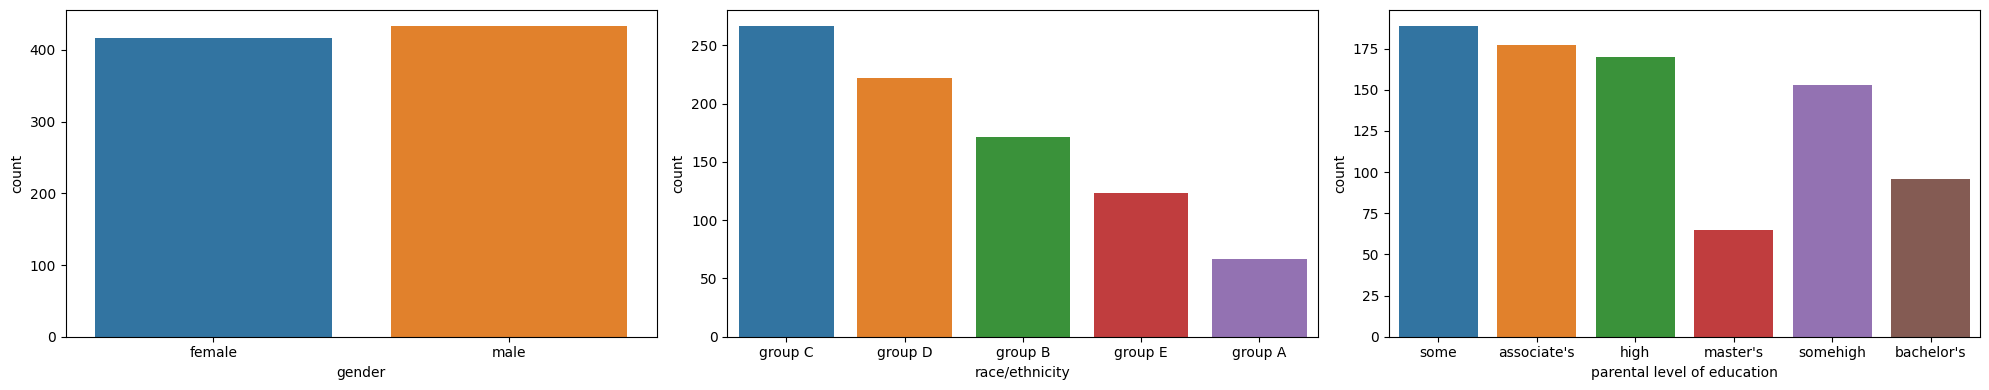

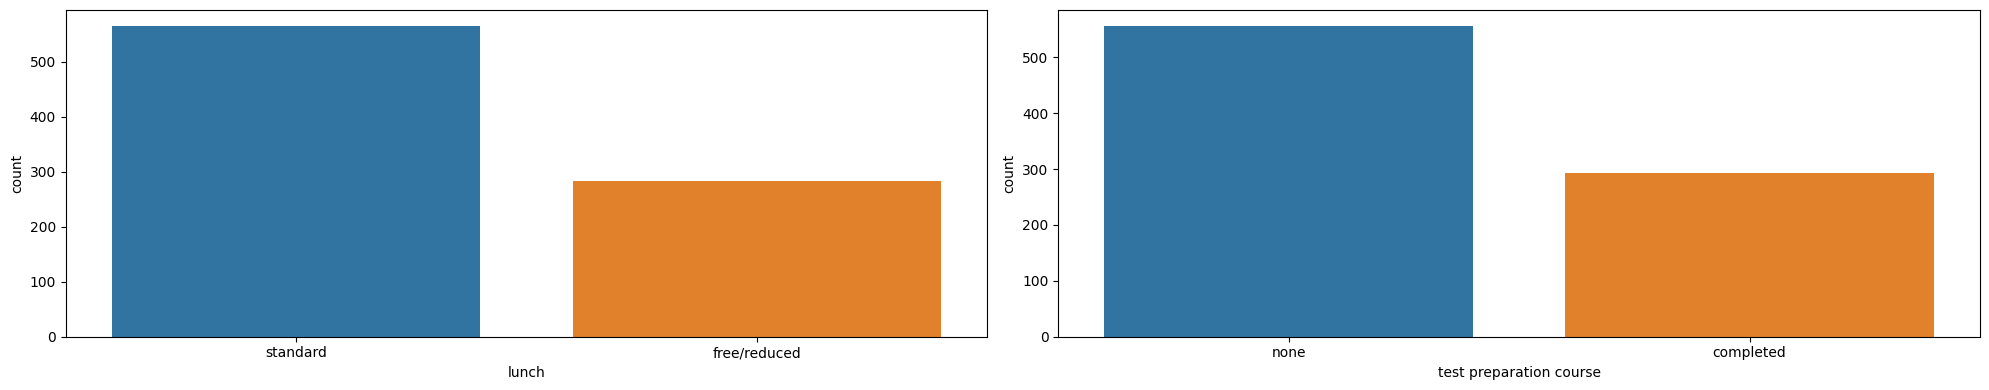

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


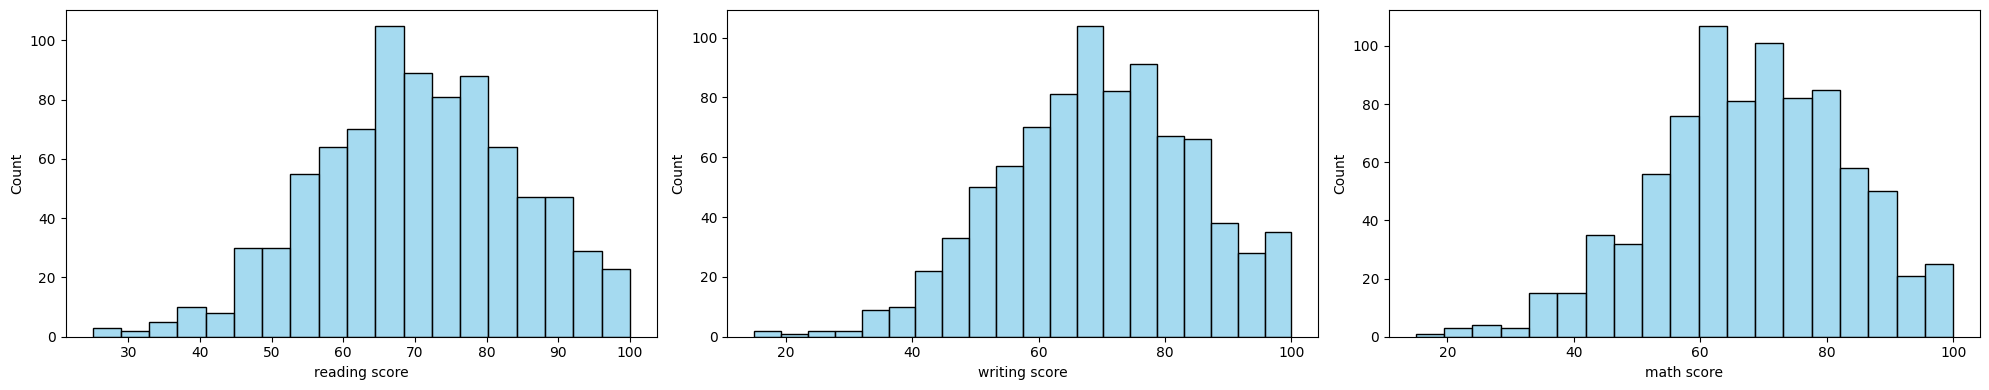

In [13]:
features=df.columns
fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
for j in range(3):
    sns.countplot(data=train, x=features[j], ax=axes1[j])

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
for j in range(3,5):
    sns.countplot(data=train, x=features[j], ax=axes2[j-3])

plt.tight_layout()
plt.show()



# Second Figure: 1 row with 2 columns
fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot histplots for the remaining 2 features on the second figure
for j in range(5,len(features)):
    sns.histplot(data=train, x=features[j], ax=axes3[j-6], color='skyblue')

plt.tight_layout()
plt.show()

Checking Outliers

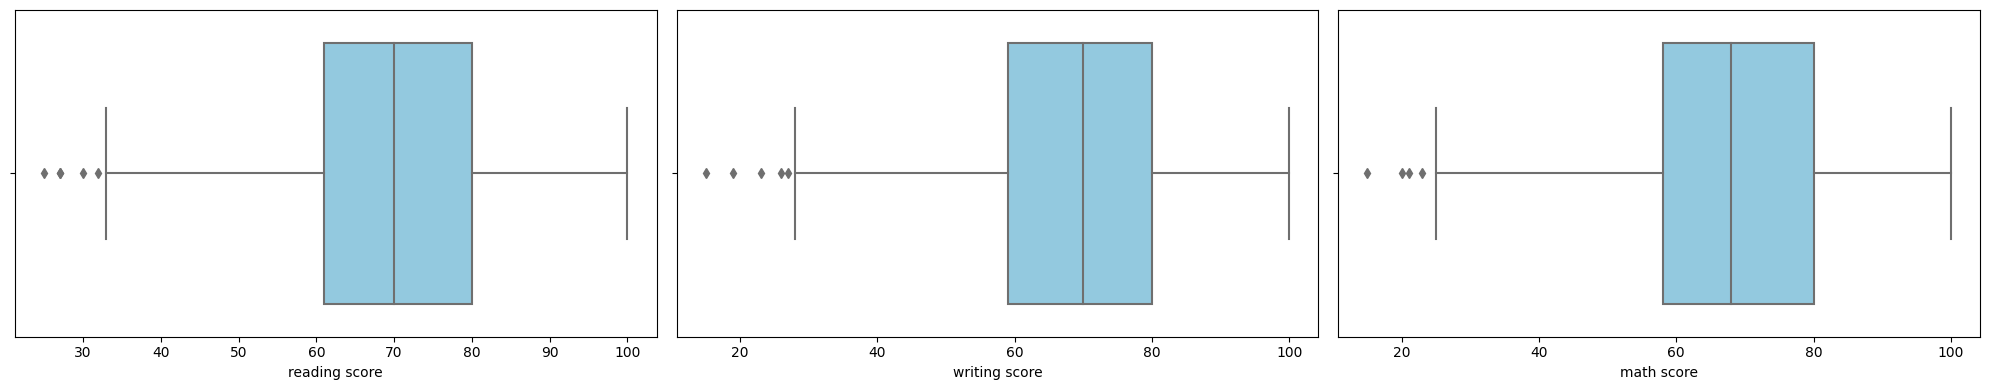

In [14]:
fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
for j in range(5,len(features)):
    sns.boxplot(data=train, x=features[j], ax=axes3[j-6], color='skyblue')

plt.tight_layout()
plt.show()

In [15]:
# for better model we can remove the very outliers 
train=train[train['reading score']>=29]
train=train[train['writing score']>=20]
train=train[train['math score']>=18]
print(len(train))

846


# Bivariate  Analysis

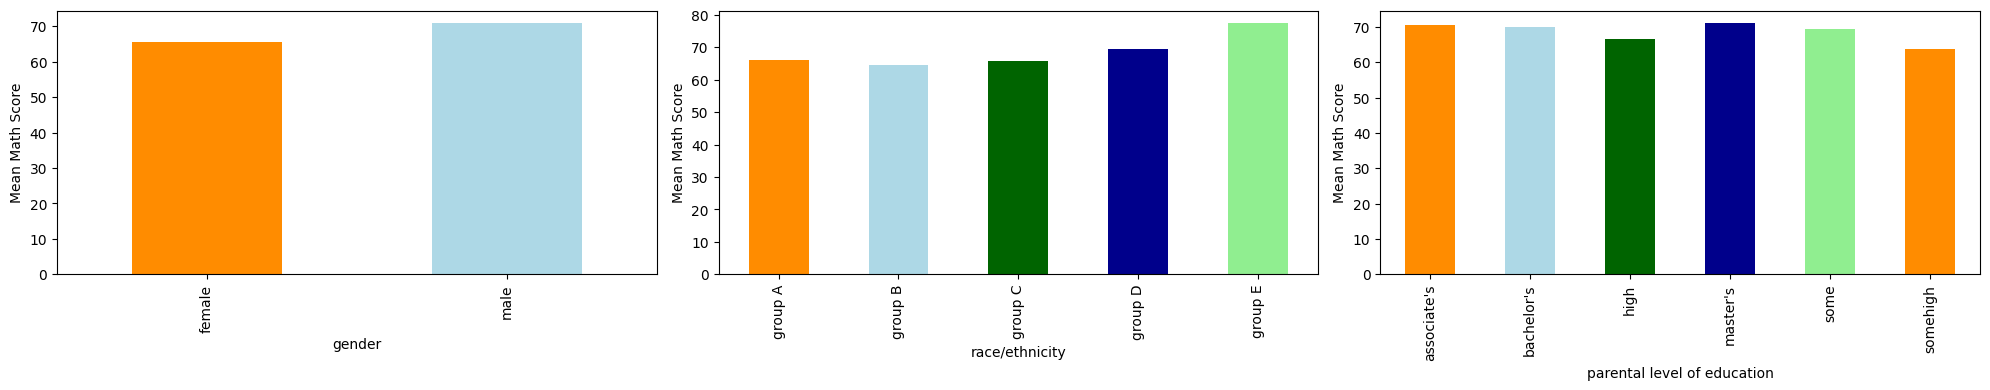

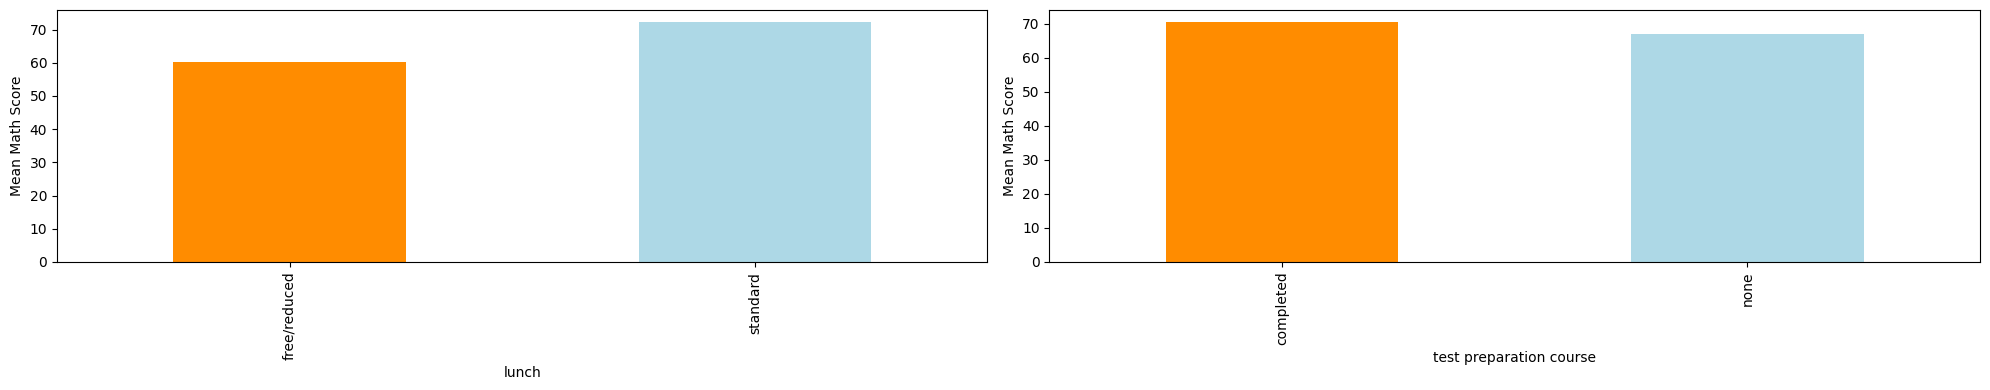

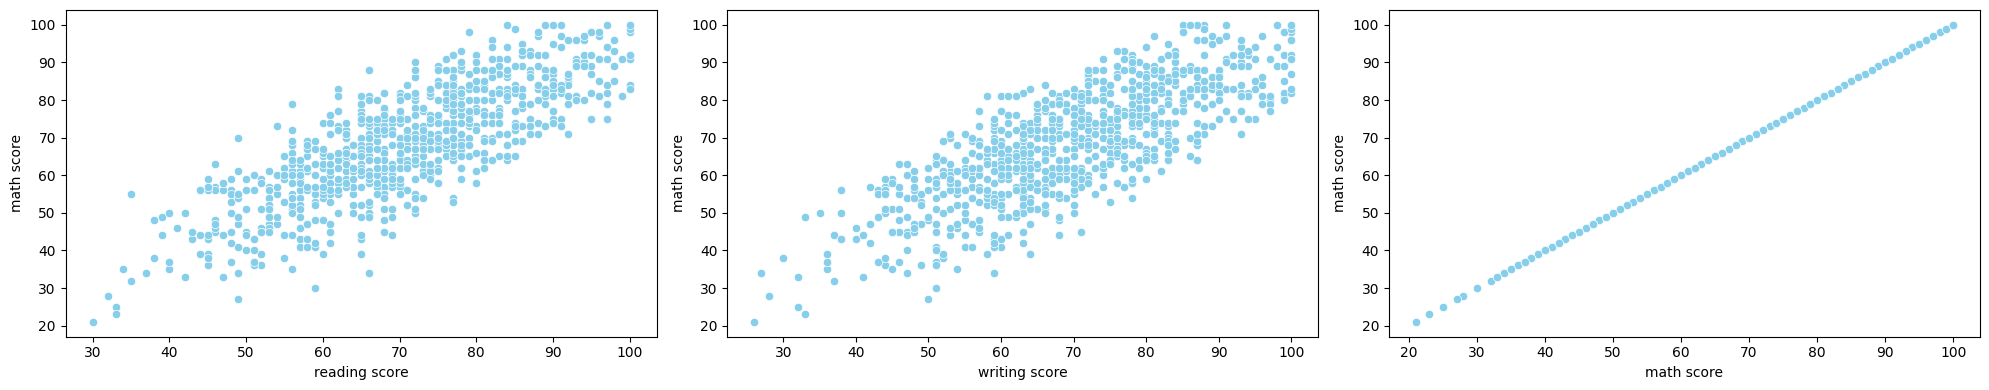

In [16]:
features=df.columns
fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
colors=['darkorange','lightblue','darkgreen','darkblue','lightgreen']
for j in range(3):
    train.groupby(features[j])['math score'].mean().plot(kind='bar', color=colors, ax=axes1[j])
    axes1[j].set_ylabel('Mean Math Score')  # Set y-axis label

    

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
for j in range(3,5):
    train.groupby(features[j])['math score'].mean().plot(kind='bar', color=colors, ax=axes2[j-3])
    axes2[j-3].set_ylabel('Mean Math Score')  # Set y-axis label


plt.tight_layout()
plt.show()



# Second Figure: 1 row with 2 columns
fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot histplots for the remaining 2 features on the second figure
for j in range(5,len(features)):
    sns.scatterplot(data=train, x=features[j],y='math score' ,ax=axes3[j-6], color='skyblue')
    

plt.tight_layout()
plt.show()

<Axes: >

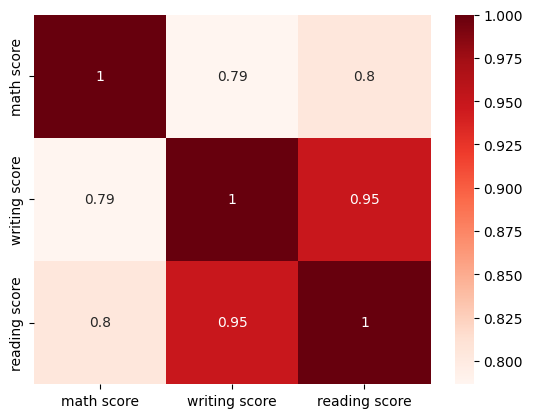

In [17]:
sns.heatmap(train[['math score','writing score','reading score']].corr(),cmap='Reds',annot=True)

we can see that there is strong correlation between writing,reading score  and the math score

#  Model Selection

In [18]:
train_x=train.drop(columns=['math score'])
train_y=train['math score'].copy()
test_x=test.drop(columns=['math score'])
test_y=test['math score'].copy()

Handling categorical data

In [19]:
train_x['gender']=train_x['gender'].replace({"male":0,"female":1})
test_x['gender']=test_x['gender'].replace({"male":0,"female":1})

train_x['lunch']=train_x['lunch'].replace({"standard":0,"free/reduced":1})
test_x['lunch']=test_x['lunch'].replace({"standard":0,"free/reduced":1})


train_x['test preparation course']=train_x['test preparation course'].replace({"none":0,"completed":1})
test_x['test preparation course']=test_x['test preparation course'].replace({"none":0,"completed":1})

train_x['parental level of education']=train_x['parental level of education'].replace({'somehigh':0,'high':1,'some':2,'associate\'s':3 ,'bachelor\'s':4,'master\'s':5})
test_x['parental level of education']=test_x['parental level of education'].replace({'somehigh':0,'high':1,'some':2,'associate\'s':3 ,'bachelor\'s':4,'master\'s':5})

import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['race/ethnicity'])
encoded_train_x = encoder.fit_transform(train_x)
encoded_test_x = encoder.transform(test_x)



/tmp/ipykernel_18/229231241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_x['gender']=train_x['gender'].replace({"male":0,"female":1})
/tmp/ipykernel_18/229231241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_x['gender']=test_x['gender'].replace({"male":0,"female":1})
/tmp/ipykernel_18/229231241.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

Scaling Continous features

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

train_scaled_columns = scaler.fit_transform(encoded_train_x[['reading score', 'writing score']])
encoded_train_x[['reading score','writing score']] = train_scaled_columns

test_scaled_columns = scaler.transform(encoded_test_x[['reading score', 'writing score']])
encoded_test_x.loc[:, ['reading score','writing score']] = test_scaled_columns



/tmp/ipykernel_18/3294365612.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4        0.74285714 0.27142857 0.28571429 0.9        0.7
 0.6        0.5        0.6        0.94285714 0.55714286 0.35714286
 0.8        0.55714286 0.28571429 0.28571429 0.44285714 0.74285714
 0.95714286 0.25714286 0.84285714 0.7        0.97142857 0.65714286
 0.8        0.25714286 0.52857143 0.82857143 0.78571429 0.54285714
 0.28571429 0.9        0.61428571 0.51428571 0.45714286 0.38571429
 0.68571429 0.72857143 0.3        0.64285714 0.61428571 0.34285714
 0.52857143 0.72857143 0.42857143 0.54285714 0.25714286 0.71428571
 0.64285714 0.58571429 0.6        0.6        0.75714286 0.71428571
 0.51428571 0.5        0.6        0.52857143 0.5        0.55714286
 0.68571429 0.11428571 0.65714286 0.65714286 0.58571429 0.65714286
 0.81428571 0.64285714 0.85714286 0.44285714 0.8        0.32857143
 0.55714286 0.57142857 0.45714286 0.52857143 0.528

In [21]:
encoded_train_x

,gender,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,parental level of education,lunch,test preparation course,reading score,writing score
264,1,0,0,1,2,0,0,0.771429,0.770270
469,0,0,1,0,3,0,1,0.542857,0.581081
144,1,0,1,0,3,0,0,0.371429,0.459459
901,1,0,1,0,1,0,0,0.742857,0.743243
331,0,0,1,0,3,0,0,0.571429,0.500000
...,...,...,...,...,...,...,...,...,...
289,1,1,0,1,5,0,0,0.571429,0.621622
109,0,1,0,0,2,0,0,0.728571,0.689189
907,0,0,1,0,1,0,1,0.600000,0.554054
480,1,0,0,1,1,0,0,0.000000,0.000000


In [22]:
encoded_train_x_intercept=sm.add_constant(encoded_train_x)
model = sm.OLS(train_y,encoded_train_x_intercept)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     603.9
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        15:41:30   Log-Likelihood:                -2634.7
No. Observations:                 846   AIC:                             5289.
Df Residuals:                     836   BIC:                             5337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**Simple Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model=LinearRegression()
model.fit(encoded_train_x,train_y)
train_predicted=model.predict(encoded_train_x)
test_predicted=model.predict(encoded_test_x)

print(f'the train r^2 = {model.score(encoded_train_x,train_y)} the train MSE = {mean_squared_error(train_y,train_predicted)}')
print('********************')
print(f'the test r^2 = {model.score(encoded_test_x,test_y)}  the test MSE = {mean_squared_error(test_y,test_predicted)}')


the train r^2 = 0.866699348001891 the train MSE = 29.686513146487172
********************
the test r^2 = 0.8785304057321985  the test MSE = 28.81310603059137


**Applying non linear regression with degree 3**

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)

poly_encoded_train_x=poly_features.fit_transform(encoded_train_x)
poly_encoded_test_x=poly_features.fit_transform(encoded_test_x)
polynomial_model=LinearRegression()
polynomial_model.fit(poly_encoded_train_x,train_y)

train_predicted=polynomial_model.predict(poly_encoded_train_x)
test_predicted=polynomial_model.predict(poly_encoded_test_x)

print(polynomial_model.score(poly_encoded_train_x,train_y))


print(polynomial_model.score(poly_encoded_test_x,test_y))


print(f'the train r^2 = {polynomial_model.score(poly_encoded_train_x,train_y)} the train MSE = {mean_squared_error(train_y,train_predicted)}')
print('********************')
print(f'the test r^2 = {polynomial_model.score(poly_encoded_test_x,test_y)}  the test MSE = {mean_squared_error(test_y,test_predicted)}')



0.8912505525720814
0.8520771690335486
the train r^2 = 0.8912505525720814 the train MSE = 24.21887554449411
********************
the test r^2 = 0.8520771690335486  the test MSE = 35.087926642654395


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])


param_grid = {
    'poly_features__degree': [1,2,3,4],}
    

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=6)

grid_search.fit(encoded_train_x,train_y)

new_model=grid_search.best_estimator_

train_predicted=new_model.predict(encoded_train_x)
test_predicted=new_model.predict(encoded_test_x)



print(f"best parameters {grid_search.best_params_} ")

print(f"best cross validation score {grid_search.best_score_} ")

print(f'the train r^2 = {new_model.score(encoded_train_x,train_y)} the train MSE = {mean_squared_error(train_y,train_predicted)}')

print(f'the test r^2 = {new_model.score(encoded_test_x,test_y)}  the test MSE = {mean_squared_error(test_y,test_predicted)}')




coefficients = new_model.named_steps['linear_regression'].coef_[1:]

intercept = new_model.named_steps['linear_regression'].intercept_


# Construct the equation
print("***************************************\n")
print("***************************************\n")


equation = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {round(coef,3)} * x{i+1}'

print("Equation:", equation)

print("")
coefficients_dict={}
for coef, column_name in zip(coefficients, encoded_train_x.columns):
    coefficients_dict[column_name] = coef

print("")
print("***************************************\n")
print("***************************************\n")


best parameters {'poly_features__degree': 1} 
best cross validation score 0.8590702376734534 
the train r^2 = 0.866699348001891 the train MSE = 29.686513146487172
the test r^2 = 0.8785304057321985  the test MSE = 28.81310603059138
***************************************

***************************************

Equation: y = 37.580725982633666 + -12.852 * x1 + 2.212 * x2 + -0.389 * x3 + -1.171 * x4 + 0.047 * x5 + -4.278 * x6 + -4.119 * x7 + 18.615 * x8 + 49.858 * x9


***************************************

***************************************



In [26]:
train_x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
264,1,group C,2,0,0,84,83
469,0,group D,3,0,1,68,69
144,1,group D,3,0,0,56,60
901,1,group D,1,0,0,82,81
331,0,group D,3,0,0,70,63
...,...,...,...,...,...,...,...
289,1,group A,5,0,0,70,72
109,0,group E,2,0,0,81,77
907,0,group D,1,0,1,72,67
480,1,group C,1,0,0,30,26


In [27]:
encoded_train_x

,gender,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,parental level of education,lunch,test preparation course,reading score,writing score
264,1,0,0,1,2,0,0,0.771429,0.770270
469,0,0,1,0,3,0,1,0.542857,0.581081
144,1,0,1,0,3,0,0,0.371429,0.459459
901,1,0,1,0,1,0,0,0.742857,0.743243
331,0,0,1,0,3,0,0,0.571429,0.500000
...,...,...,...,...,...,...,...,...,...
289,1,1,0,1,5,0,0,0.571429,0.621622
109,0,1,0,0,2,0,0,0.728571,0.689189
907,0,0,1,0,1,0,1,0.600000,0.554054
480,1,0,0,1,1,0,0,0.000000,0.000000


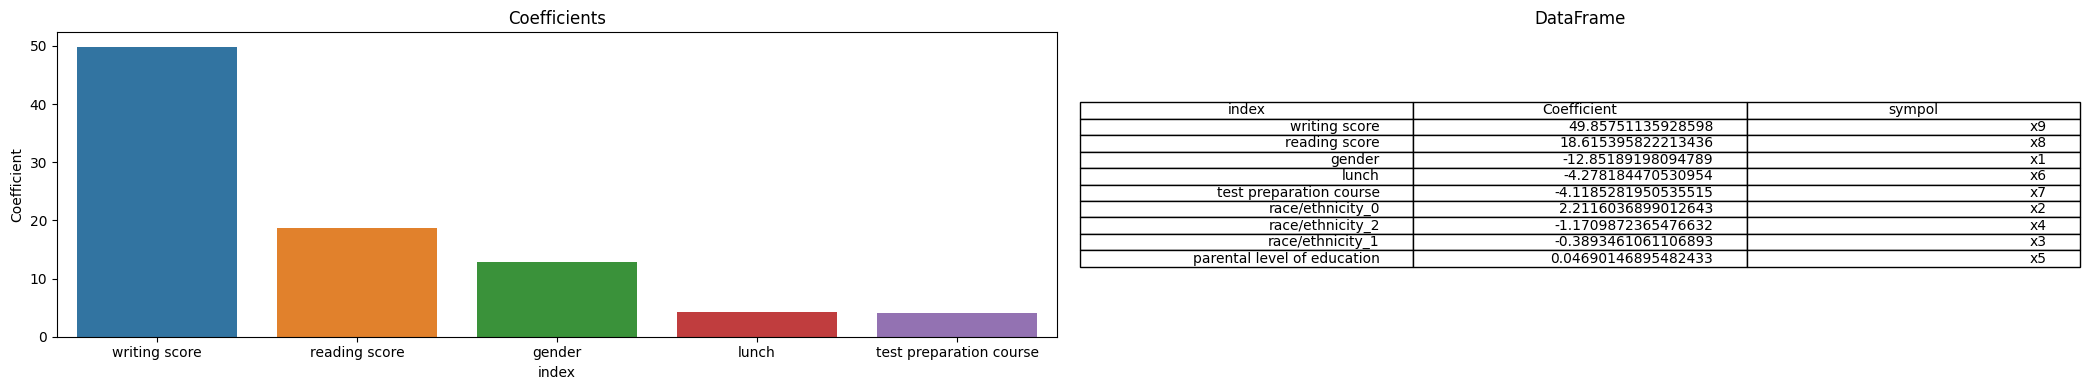

In [28]:

coefficients_df = pd.DataFrame.from_dict(coefficients_dict, orient='index', columns=['Coefficient'])

# Reset index and increase by 1
coefficients_df.reset_index(inplace=True)
coefficients_df.index += 1

# Add prefix 'x' to the index


# Add absolute values of coefficients as a dummy column for sorting
coefficients_df['dummy'] = abs(coefficients_df['Coefficient'])

# Sort DataFrame by absolute values of coefficients
coefficients_df.sort_values(by='dummy', ascending=False, inplace=True)

# Drop the dummy column
coefficients_df.drop(columns=['dummy'], inplace=True)

# Plot DataFrame
plt.figure(figsize=(21, 4))

# Plot DataFrame
plt.subplot(1, 2, 1)
sns.barplot(x=coefficients_df['index'][0:5], y=abs(coefficients_df['Coefficient'][0:5]))
plt.title('Coefficients')

coefficients_df['sympol'] = 'x' + coefficients_df.index.astype(str)
# Print DataFrame
plt.subplot(1, 2, 2)
plt.axis('off')  # Turn off axis for DataFrame
plt.table(cellText=coefficients_df.values,
          colLabels=coefficients_df.columns,
          loc='center')
plt.title('DataFrame')

plt.tight_layout()
plt.show()


In [29]:
grid_search.cv_results_['mean_test_score']

array([0.85907024, 0.85693647, 0.8290701 , 0.24132835])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

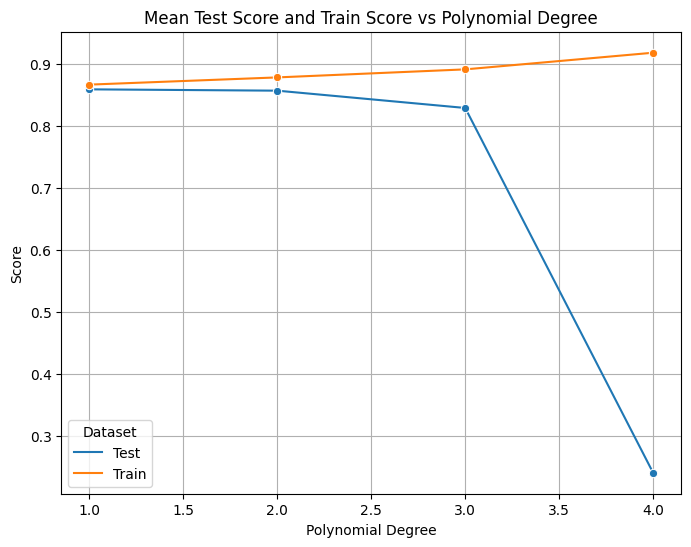

In [30]:
train_score_vs_degree = []
for j in range(1, 5):
    poly_features = PolynomialFeatures(degree=j)
    poly_encoded_train_x = poly_features.fit_transform(encoded_train_x)
    poly_encoded_test_x = poly_features.fit_transform(encoded_test_x)
    polynomial_model = LinearRegression()
    polynomial_model.fit(poly_encoded_train_x, train_y)
    train_score_vs_degree.append(polynomial_model.score(poly_encoded_train_x, train_y))

# Create DataFrames for both train and test scores
degrees = [1, 2, 3, 4]
scores_df = pd.DataFrame({
    'Degree': degrees * 2,
    'Score': list(grid_search.cv_results_['mean_test_score'][0:5]) + train_score_vs_degree,
    'Dataset': ['Test'] * 4 + ['Train'] * 4
})

# Plot the scores
plt.figure(figsize=(8, 6))
sns.lineplot(data=scores_df, x='Degree', y='Score', hue='Dataset', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Mean Test Score and Train Score vs Polynomial Degree')
plt.grid(True)
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('ridge_regression', Ridge())
    
])

param_grid = {
    'poly_features__degree': [1,2,3,4,5,6],
    'ridge_regression__alpha': [0.01, 0.1, 1.0, 10.0,100,1000]  
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(encoded_train_x,train_y)


new_model=grid_search.best_estimator_

train_predicted=new_model.predict(encoded_train_x)
test_predicted=new_model.predict(encoded_test_x)



print(f"best parameters {grid_search.best_params_} ")

print(f"best cross validation score {grid_search.best_score_} ")

print(f'the train r^2 = {new_model.score(encoded_train_x,train_y)} the train MSE = {mean_squared_error(train_y,train_predicted)}')

print(f'the test r^2 = {new_model.score(encoded_test_x,test_y)}  the test MSE = {mean_squared_error(test_y,test_predicted)}')




coefficients = new_model.named_steps['ridge_regression'].coef_[1:]

intercept = new_model.named_steps['ridge_regression'].intercept_


# Construct the equation
print("***************************************\n")
print("***************************************\n")


equation = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {round(coef,3)} * x{i+1}'

print("Equation:", equation)

print("")
coefficients_dict={}
for coef, column_name in zip(coefficients, encoded_train_x.columns):
    coefficients_dict[column_name] = coef

print("")
print("***************************************\n")
print("***************************************\n")


best parameters {'poly_features__degree': 1, 'ridge_regression__alpha': 0.1} 
best cross validation score 0.8611203931315445 
the train r^2 = 0.8666773553297876 the train MSE = 29.691410990119117
the test r^2 = 0.878648012883514  the test MSE = 28.78520911250883
***************************************

***************************************

Equation: y = 37.67619270624124 + -12.793 * x1 + 2.199 * x2 + -0.398 * x3 + -1.204 * x4 + 0.058 * x5 + -4.306 * x6 + -4.042 * x7 + 19.639 * x8 + 48.61 * x9


***************************************

***************************************



<Axes: xlabel='deg_alpha', ylabel='mean_test_score'>

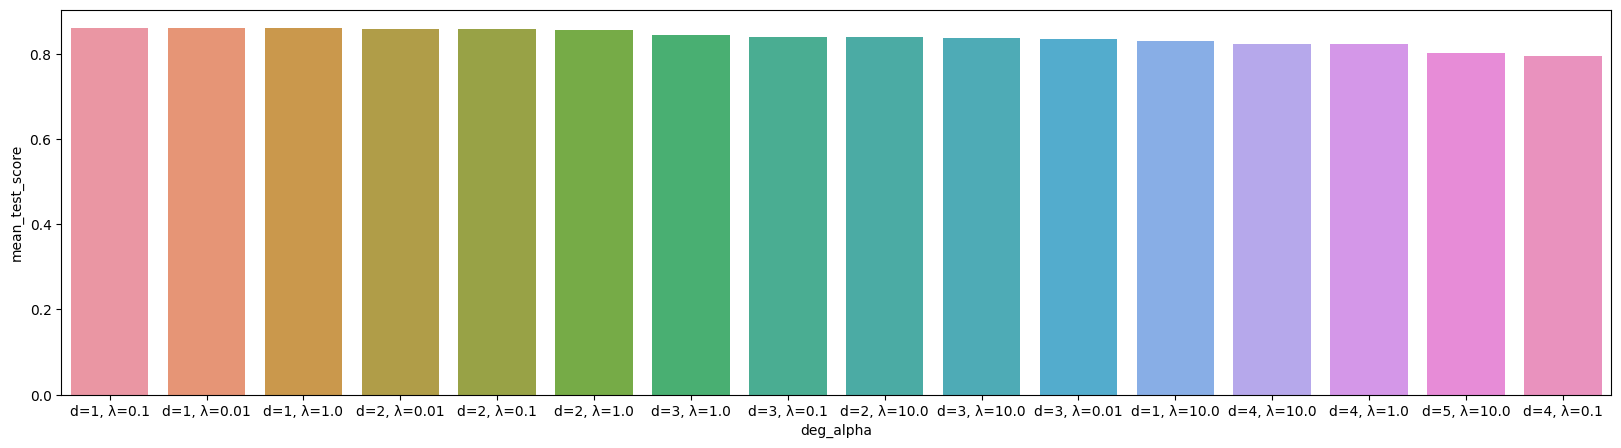

In [32]:
grid_scores=pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score',ascending=False)
grid_scores.rename(columns={'param_poly_features__degree':'deg','param_ridge_regression__alpha':'alpha'},inplace=True)
grid_scores['deg_alpha'] = 'd=' + grid_scores['deg'].astype(str) + ', λ=' + grid_scores['alpha'].astype(str)
plt.figure(figsize=(20, 5))

sns.barplot(data=grid_scores[:16],x='deg_alpha',y='mean_test_score')

In [33]:
from sklearn.neighbors import KNeighborsRegressor


knn_regressor = KNeighborsRegressor() 
knn_regressor.fit(encoded_train_x, train_y)  
train_predicted=knn_regressor.predict(encoded_train_x)
test_predicted=knn_regressor.predict(encoded_test_x)
print(f'train r^2 {knn_regressor.score(encoded_train_x,train_y)} MSE : {mean_squared_error(train_y,train_predicted)}')
print(f'test r^2 {knn_regressor.score(encoded_test_x,test_y)} MSE {mean_squared_error(train_y,train_predicted)}')



train r^2 0.6713094256958732 MSE : 73.20052009456265
test r^2 0.5308639754653091 MSE 73.20052009456265


Trying different K 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

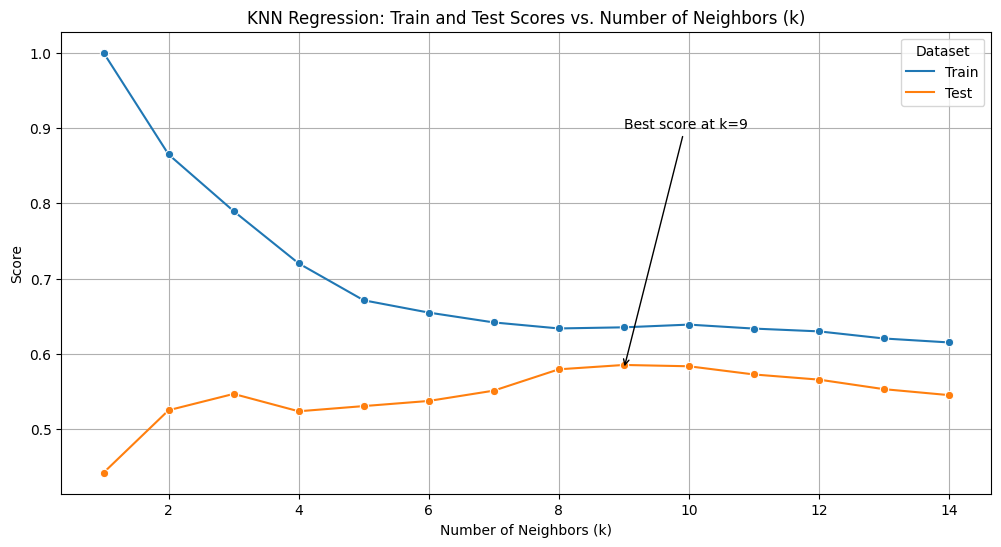

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store scores
train_scores = []
test_scores = []

# Iterate over different values of k
for k in range(1, 15):
    # Initialize and fit the KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(encoded_train_x, train_y)
    
    # Calculate and append scores for training and test data
    train_scores.append(knn_regressor.score(encoded_train_x, train_y))
    test_scores.append(knn_regressor.score(encoded_test_x, test_y))

# Create DataFrame for scores
k = list(range(1, 15))
scores_df = pd.DataFrame({
    'k': k * 2,
    'Score': train_scores + test_scores,
    'Dataset': ['Train'] * 14 + ['Test'] * 14
})

# Plot scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=scores_df, x='k', y='Score', hue='Dataset', marker='o')

# Add annotation for the arrow
plt.annotate('Best score at k=9', xy=(9, 0.58),
             xytext=(9, max(scores_df['Score']) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot title and labels
plt.title('KNN Regression: Train and Test Scores vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)

plt.show()
